# Store Sales Data Analysis

## Performed by Piyush Borhade

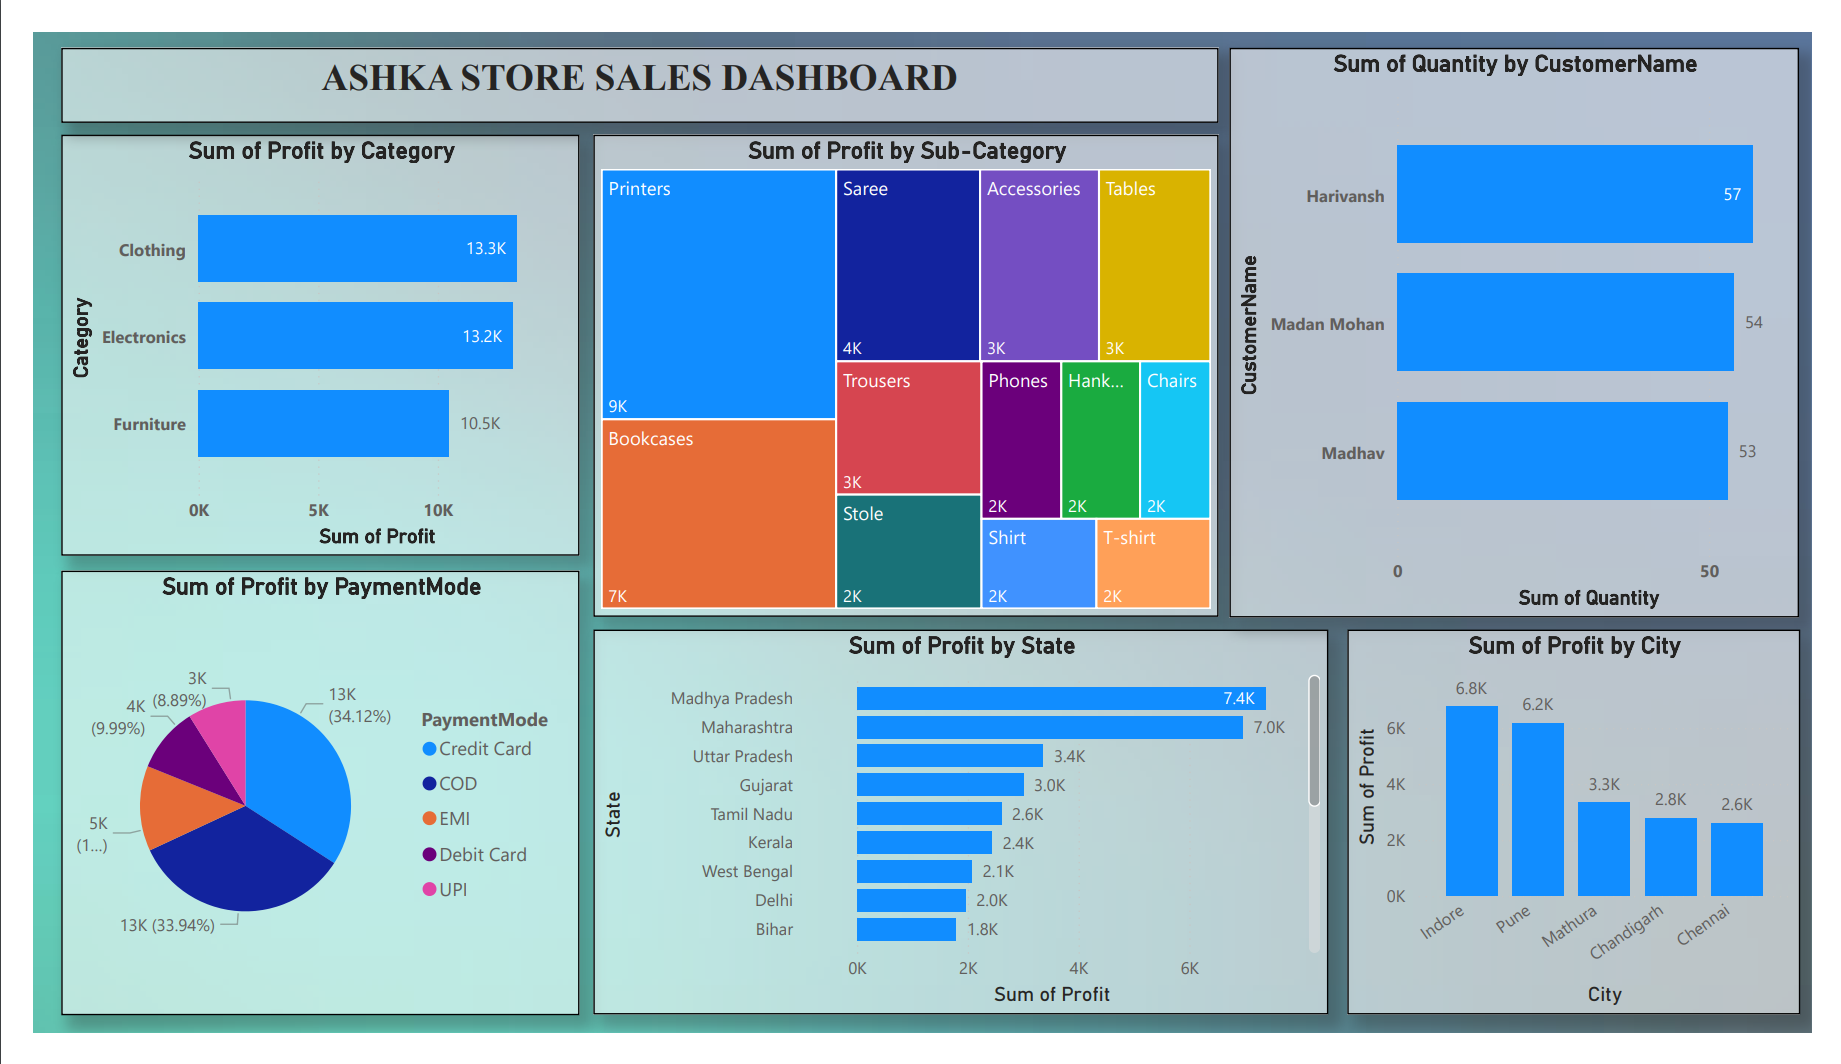

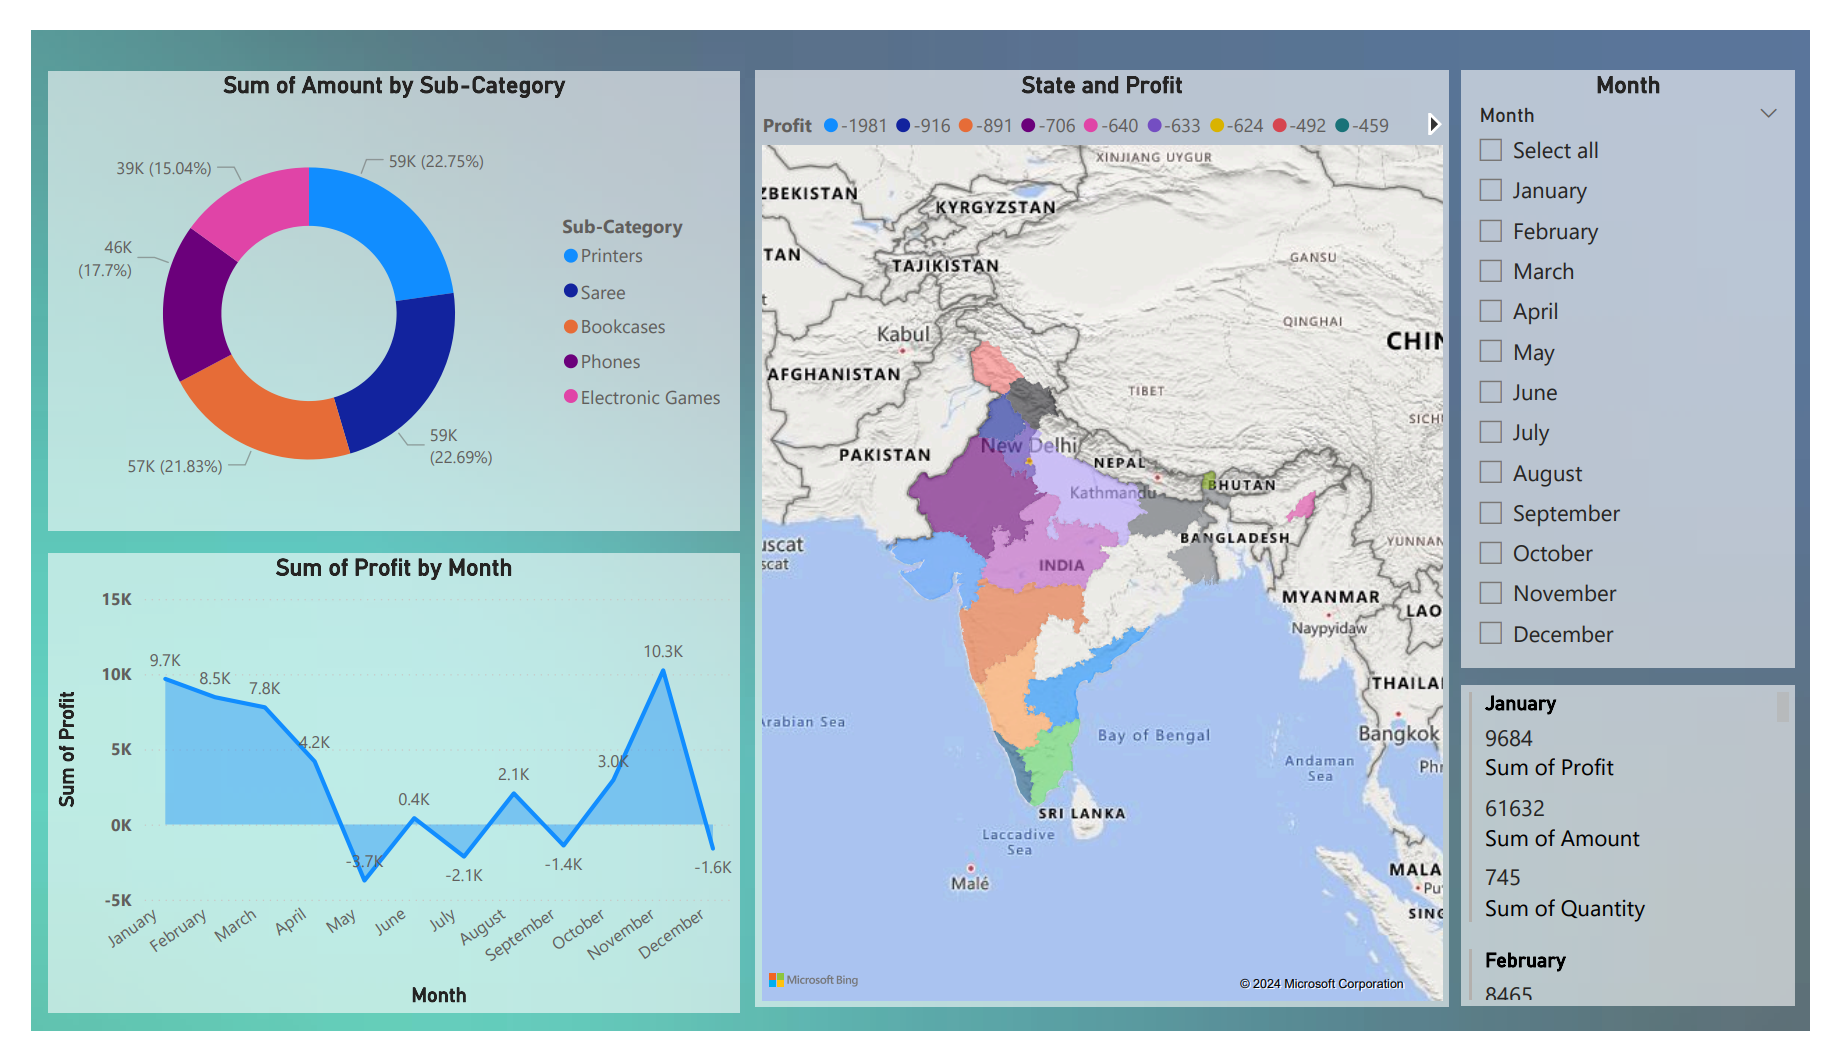

**Above Dashboards are created on Powerbi**

# Objective:
**To extract meaningful insights from data analysis aimed at enhancing customer satisfaction.**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('STORE DATA ANALYSIS.xlsx')
df

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-25681,1096,658,7,Electronics,Electronic Games,COD
1,B-26055,5729,64,14,Furniture,Chairs,EMI
2,B-25955,2927,146,8,Furniture,Bookcases,EMI
3,B-26093,2847,712,8,Electronics,Printers,Credit Card
4,B-25602,2617,1151,4,Electronics,Phones,Credit Card
...,...,...,...,...,...,...,...
1495,B-25700,7,-3,2,Clothing,Hankerchief,COD
1496,B-25757,3151,-35,7,Clothing,Trousers,EMI
1497,B-25973,4141,1698,13,Electronics,Printers,COD
1498,B-25698,7,-2,1,Clothing,Hankerchief,COD


**Performing Exploratory data analysis**

In [3]:
df.columns

Index(['Order ID', 'Amount', 'Profit', 'Quantity', 'Category', 'Sub-Category',
       'PaymentMode'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1500 non-null   object
 1   Amount        1500 non-null   int64 
 2   Profit        1500 non-null   int64 
 3   Quantity      1500 non-null   int64 
 4   Category      1500 non-null   object
 5   Sub-Category  1500 non-null   object
 6   PaymentMode   1500 non-null   object
dtypes: int64(3), object(4)
memory usage: 82.2+ KB


In [5]:
df.describe()

,Amount,Profit,Quantity
count,1500.000000,1500.00000,1500.000000
mean,291.847333,24.64200,3.743333
std,461.924620,168.55881,2.184942
min,4.000000,-1981.00000,1.000000
25%,47.750000,-12.00000,2.000000
50%,122.000000,8.00000,3.000000
75%,326.250000,38.00000,5.000000
max,5729.000000,1864.00000,14.000000


In [6]:
df.dtypes

Order ID        object
Amount           int64
Profit           int64
Quantity         int64
Category        object
Sub-Category    object
PaymentMode     object
dtype: object

In [7]:
df.isnull().sum()

Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
dtype: int64

In [29]:
df.duplicated().sum()

0

In [8]:
cm = df.select_dtypes(exclude=['object']).corr()
cm

,Amount,Profit,Quantity
Amount,1.000000,0.309242,0.352486
Profit,0.309242,1.000000,0.063096
Quantity,0.352486,0.063096,1.000000


<Axes: >

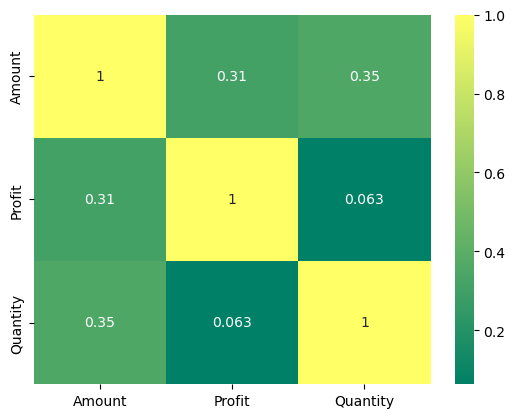

In [9]:
sns.heatmap(cm, annot=True, cmap='summer')

In [10]:
df['Category'].unique()

array(['Electronics', 'Furniture', 'Clothing'], dtype=object)

In [11]:
df['Category'].value_counts()

Category
Clothing       949
Electronics    308
Furniture      243
Name: count, dtype: int64

<Axes: xlabel='Category'>

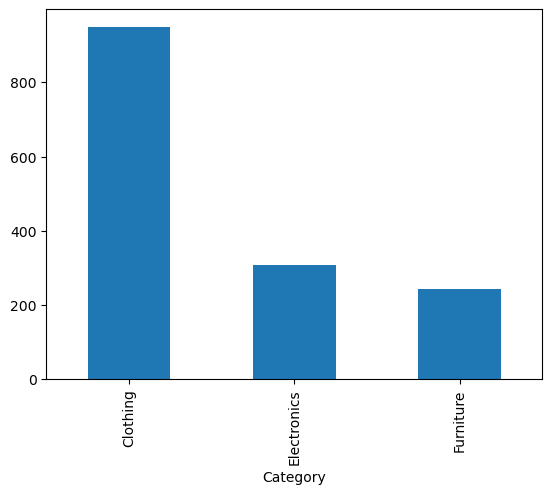

In [12]:
df['Category'].value_counts().plot(kind='bar')

In [13]:
df['Sub-Category'].unique()

array(['Electronic Games', 'Chairs', 'Bookcases', 'Printers', 'Phones',
       'Trousers', 'Saree', 'Hankerchief', 'Kurti', 'Skirt', 'Tables',
       'Stole', 'Leggings', 'Accessories', 'T-shirt', 'Furnishings',
       'Shirt'], dtype=object)

In [14]:
df['Sub-Category'].value_counts()

Sub-Category
Saree               211
Hankerchief         197
Stole               192
Phones               83
Electronic Games     79
Bookcases            79
T-shirt              77
Printers             74
Chairs               74
Furnishings          73
Accessories          72
Shirt                69
Skirt                64
Leggings             53
Kurti                47
Trousers             39
Tables               17
Name: count, dtype: int64

<Axes: xlabel='Sub-Category'>

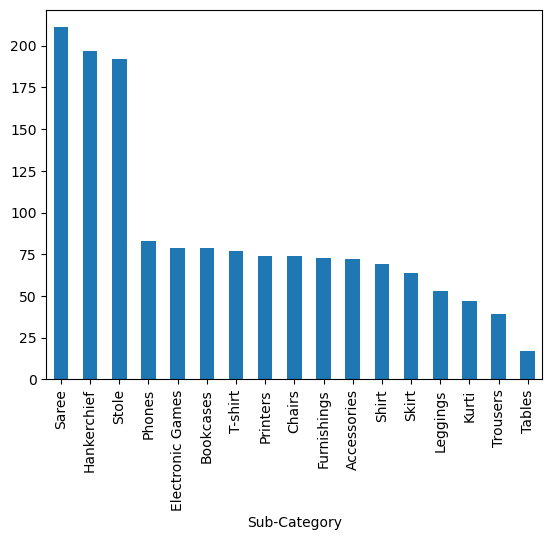

In [15]:
df['Sub-Category'].value_counts().plot(kind='bar')

In [16]:
df['PaymentMode'].unique()

array(['COD', 'EMI', 'Credit Card', 'UPI', 'Debit Card'], dtype=object)

In [17]:
df['PaymentMode'].value_counts()

PaymentMode
COD            684
UPI            331
Debit Card     202
Credit Card    163
EMI            120
Name: count, dtype: int64

<Axes: xlabel='PaymentMode'>

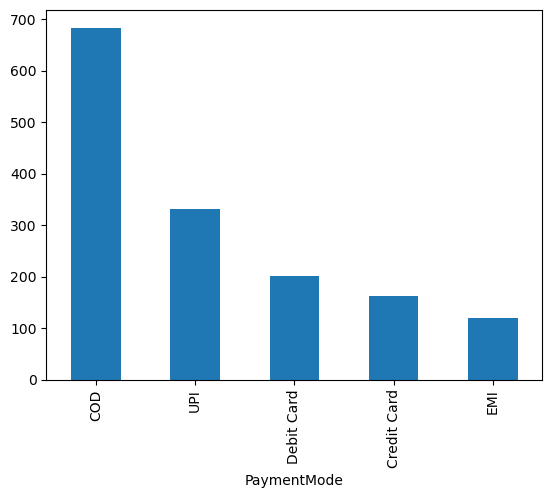

In [18]:
df['PaymentMode'].value_counts().plot(kind='bar')

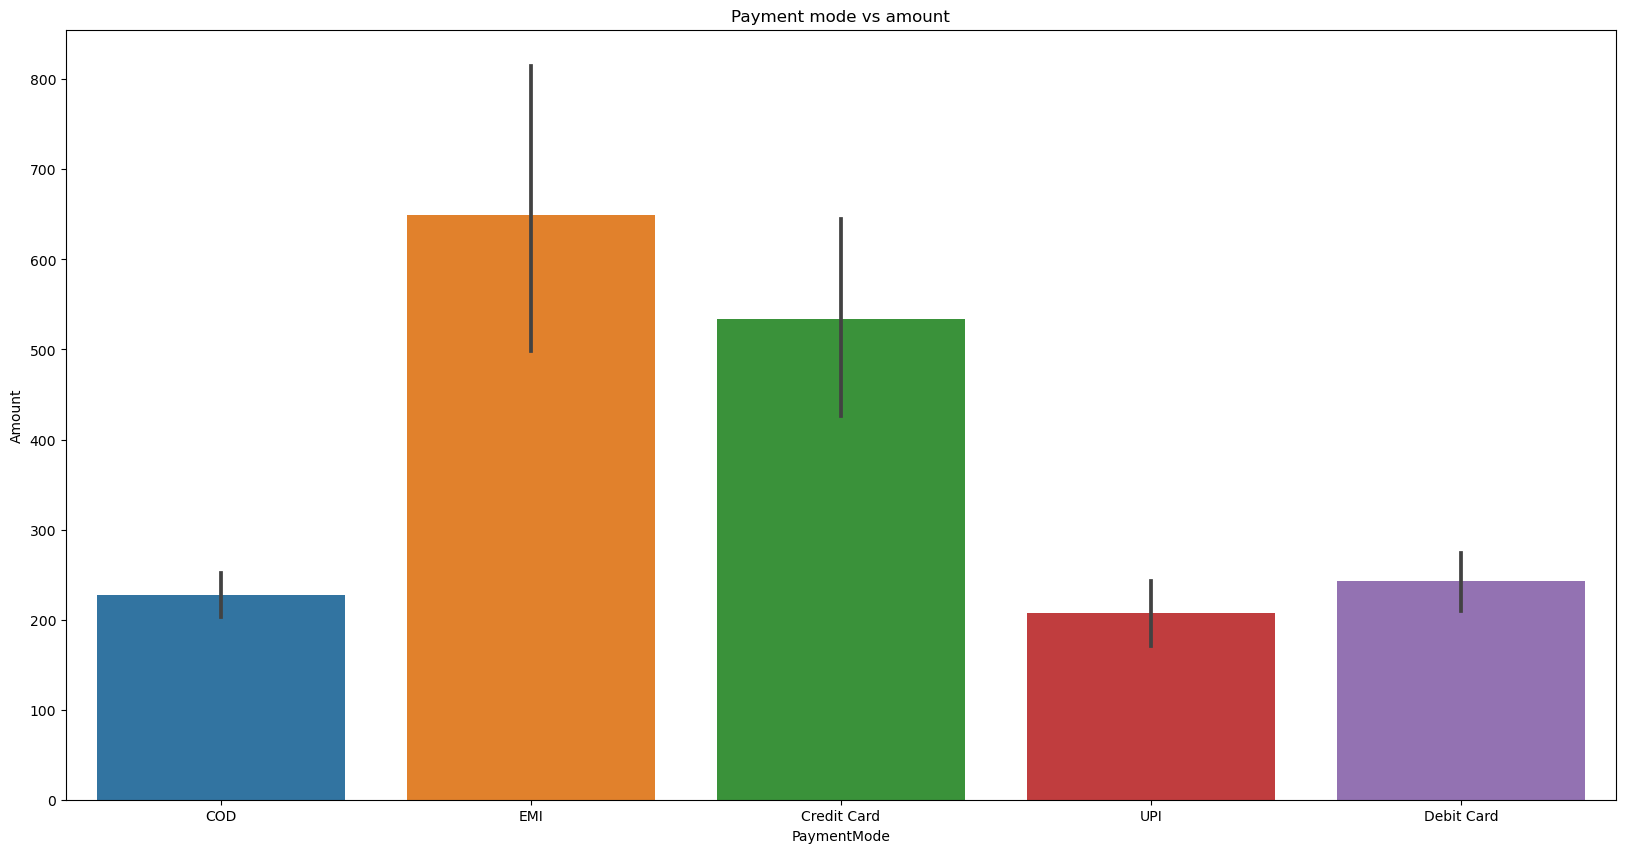

In [19]:
plt.figure(figsize = (20,10))
sns.barplot(x = 'PaymentMode',
            y = 'Amount',            
            data = df).set(title = "Payment mode vs amount");
plt.show()

**We can see that EMI is most used payment mode among all other while COD and UPI is least used for payment when we plot it with amount!**

In [20]:
df.columns

Index(['Order ID', 'Amount', 'Profit', 'Quantity', 'Category', 'Sub-Category',
       'PaymentMode'],
      dtype='object')

In [30]:
df['Amount'].sum()

437771

In [32]:
df['Profit'].mean()

24.642

In [33]:
df.groupby('Category')['Quantity'].sum()

Category
Clothing       3516
Electronics    1154
Furniture       945
Name: Quantity, dtype: int64

In [35]:
df.groupby('PaymentMode')['Amount'].sum()

PaymentMode
COD            155181
Credit Card     86932
Debit Card      49136
EMI             77881
UPI             68641
Name: Amount, dtype: int64

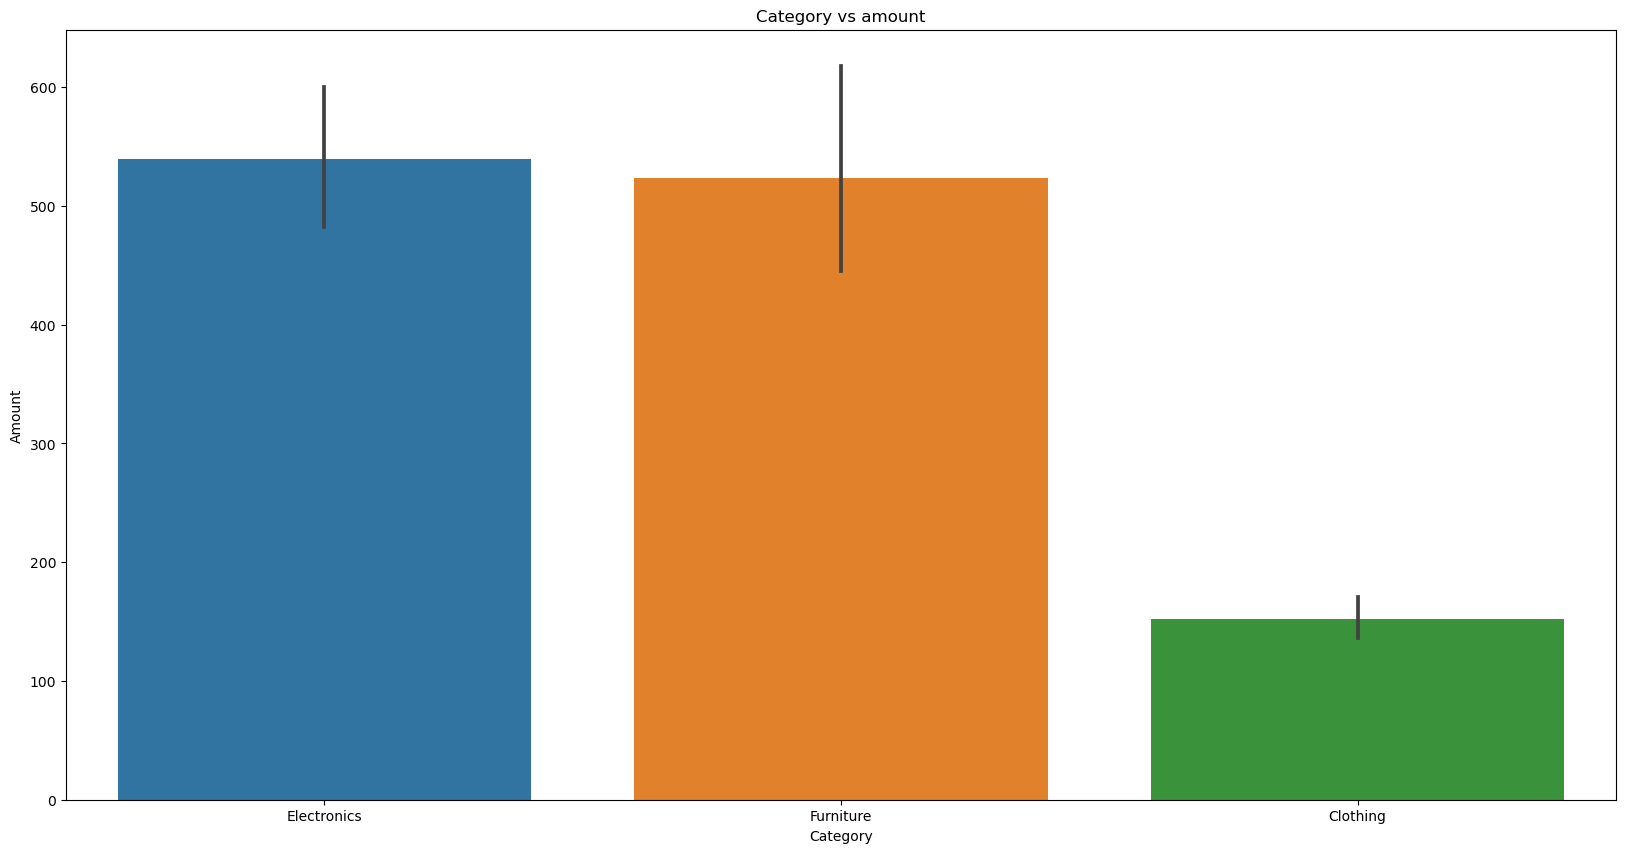

In [21]:
plt.figure(figsize = (20,10))
sns.barplot(x = 'Category',
            y = 'Amount',            
            data = df).set(title = "Category vs amount");
plt.show()

### Which is the most and least priced Product? 

In [22]:
most_profit = df['Profit'].max()
most_profit

1864

In [23]:
profit_product = df.loc[df['Profit'] ==  most_profit]
profit_product

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
59,B-25608,1364,1864,5,Furniture,Tables,Credit Card


**most profit made was 1864, which was 5 tables and the payment was done by credit card!**

In [24]:
least_profit = df['Profit'].min()
least_profit

-1981

In [25]:
least_product = df.loc[df['Profit'] == least_profit]
least_product

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
1492,B-25798,2830,-1981,13,Furniture,Bookcases,EMI


**loss made was 1981, which was 13 bookcases and the payment was done by EMI!**

D:\new\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


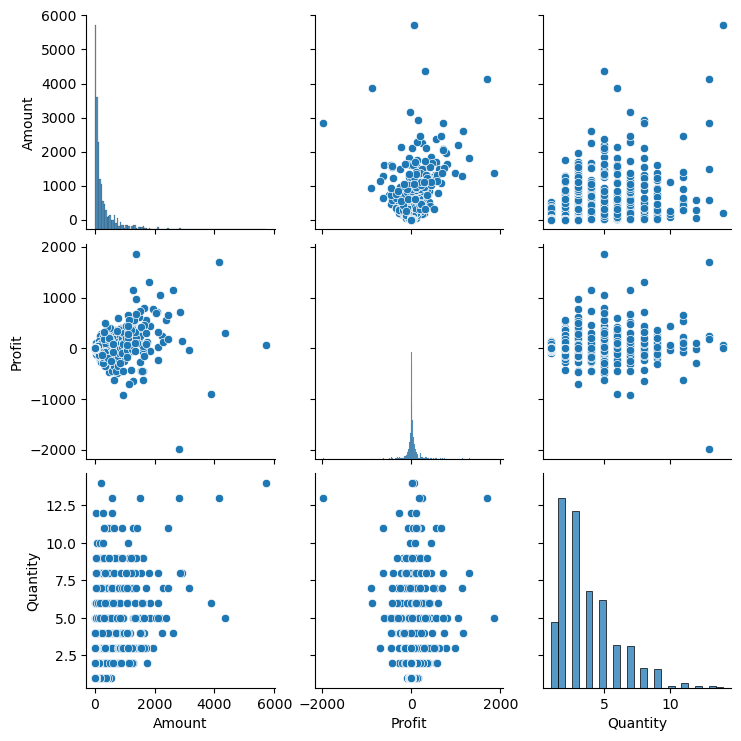

In [26]:
sns.pairplot(df)

<Axes: xlabel='Category'>

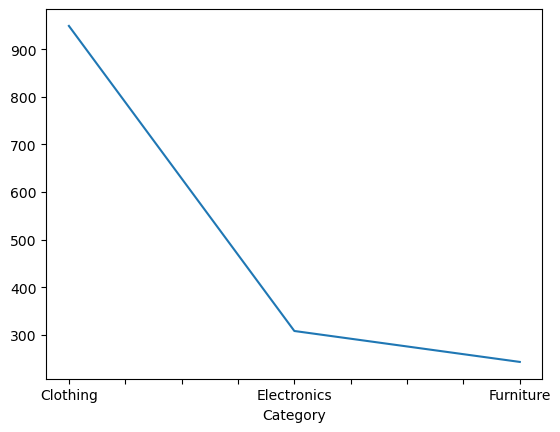

In [27]:
df['Category'].value_counts().plot()
#plt.title('Purchased Items by Season')

**Category and Sub-Category Analysis**

**Payment Mode Analysis**

In [ ]:
The dataset includes five payment modes: COD, EMI, Credit Card, UPI, and Debit Card. Cash on Delivery (COD) is the most preferred payment mode, with 684 transactions.

**Order and Quantity Metrics**

# Conclusion

**This analysis provides valuable insights into the store's performance, allowing for informed
decision-making. Continuous monitoring and further in-depth analyses will aid in adapting
strategies to meet evolving market trends and customer preferences.**

Don't forget to follow me on [Medium](https://medium.com/@borhadepiyush) | [GitHub](https://github.com/PiyushBorhade) | [Linkedin](https://www.linkedin.com/in/piyush-borhade/) | [Kaggle](https://www.kaggle.com/piyushborhade) |  😎